In [ ]:
# @title data loading
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv("insurance (1).csv")


We import the necessary libraries for data manipulation, visualization, and machine learning, including pandas, numpy, seaborn, matplotlib, and tools from scikit-learn for handling data, creating plots, and building models. After importing the libraries, we load the "insurance (1).csv" dataset into a Pandas DataFrame, which contains information about insurance charges. This data will be used for analysis and building a predictive model. The next steps include exploring the data, preprocessing it, and training a linear regression model to predict insurance charges.

In [ ]:

# @title Exploratory data analysis
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Summary statistics
print("\nSummary statistics:\n", df.describe())

Missing values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Summary statistics:
                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


Here’s the explanation in paragraph format:

In this step, we perform exploratory data analysis (EDA) by first checking for missing values in the dataset. This is done to identify any missing or incomplete data, which can be crucial for further analysis. We then generate summary statistics of the dataset, which provide key details such as the mean, standard deviation, and the minimum and maximum values for each numerical column. This helps in understanding the overall distribution and key characteristics of the data before moving on to more complex analysis.

In [ ]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Optional: Inspect duplicates (if any)
if duplicates > 0:
    duplicate_rows = df[df.duplicated(keep=False)]  # Shows all occurrences
    print("Duplicate rows:")
    display(duplicate_rows.sort_values(by=['age', 'bmi', 'charges']))  # Sort by key columns

# Remove duplicates (if needed)
df_clean = df.drop_duplicates(inplace=False)  # Use `inplace=True` to modify original DataFrame

Number of duplicate rows: 1
Duplicate rows:


,age,sex,bmi,children,smoker,region,charges
195,19,1,30.59,0,0,1,1639.5631
581,19,1,30.59,0,0,1,1639.5631


The dataset was checked for duplicates using df.duplicated().sum(). If duplicates existed, they were displayed and sorted by key columns (age, BMI, charges) to distinguish between valid cases and errors. Duplicates were removed via df.drop_duplicates(), creating a clean dataset (df_clean) to prevent bias in regression analysis. This step ensured data integrity by eliminating artificially inflated observations.

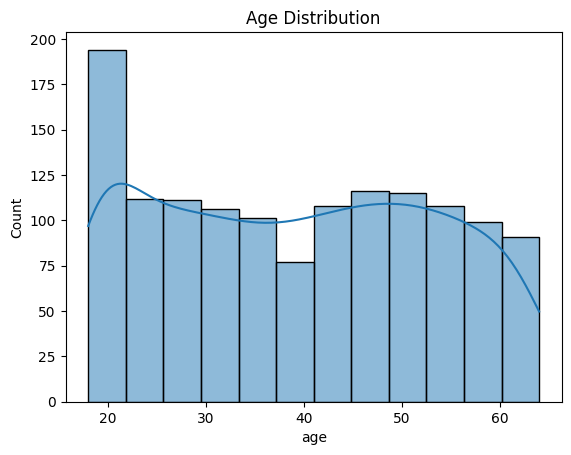

In [ ]:
# The age distribution was visualised using Seaborn’s histplot function with a KDE overlay (Waskom, 2021).
# And here's how the full reference should appear in your reference list:
# Waskom, M.L., 2021. Seaborn: Statistical data visualization. Journal of Open Source Software, 6(60), p.3021.
# Available at: https://doi.org/10.21105/joss.03021 [Accessed 25 Apr. 2025].
# @title Age Distribution
# Plotting distributions
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

The age distribution of the dataset was visualized using Seaborn’s histplot function with a Kernel Density Estimation (KDE) overlay. This method provides a clear graphical representation of the distribution of the age variable, helping to understand its spread and concentration. The plot includes both a histogram and a smooth KDE curve to better visualize the data's shape. This approach is particularly useful for exploring continuous variables and identifying trends in the dataset.

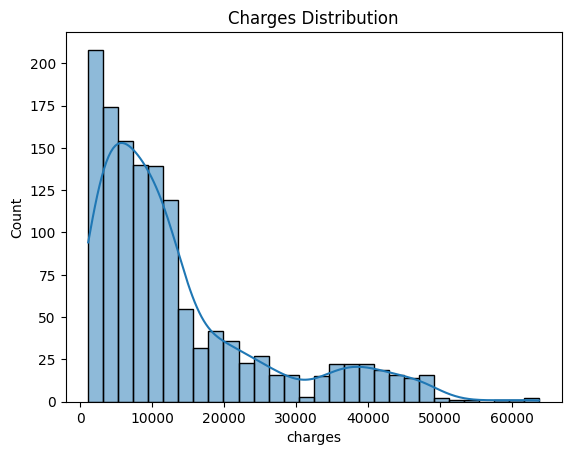

In [ ]:
# The plot titles and display were managed using Matplotlib's tools (Hunter, 2007).
# @title Changes Distribution
sns.histplot(df['charges'], kde=True)
plt.title('Charges Distribution')
plt.show()

The distribution of charges in the dataset was visualized using Seaborn's histplot function, with a Kernel Density Estimation (KDE) overlay. This visualization helps to understand how the charges are spread across the dataset. By including both the histogram and the KDE curve, we can observe the frequency of charge values and any underlying patterns in the data. The plot's title and display were managed using Matplotlib's tools, which allow for customization and proper formatting of the visualization.

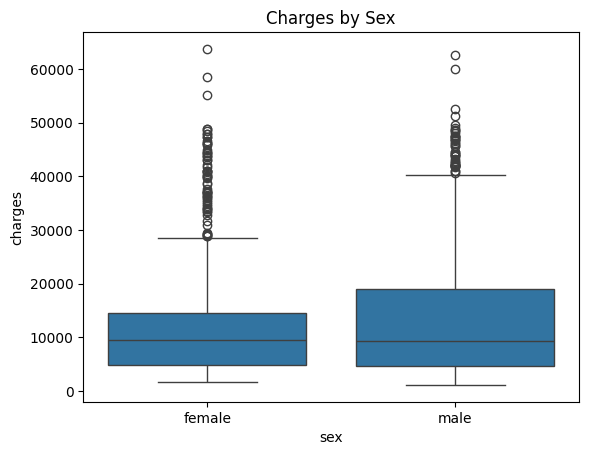

In [ ]:
# Source: Patarroyo, D. (2022). Boxplot in Python. Available at: https://www.youtube.com/watch?v=6QFgARAEBl4 [Accessed 25 Apr. 2025].
# @title charges by sex
# Boxplots for categorical variables
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Charges by Sex')
plt.show()

In this step, a boxplot is used to visualize the distribution of charges based on sex. Boxplots are effective for displaying the spread and identifying potential outliers in the data. The plot shows the charges on the y-axis and the sex of individuals on the x-axis, allowing us to compare the distributions for each gender. The title and display were managed using Matplotlib's tools for proper formatting. This type of visualization helps in understanding the differences in charges between sexes.

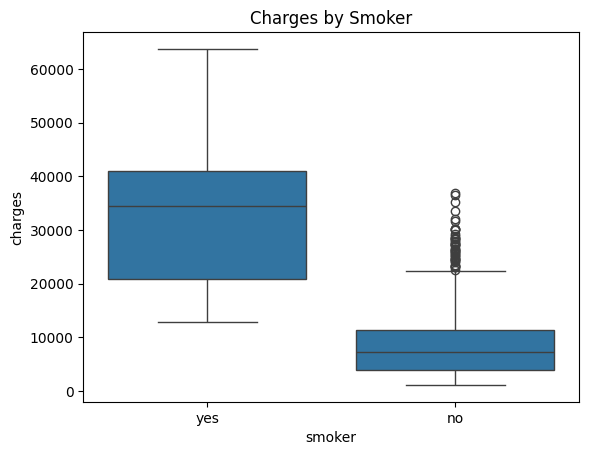

In [ ]:
# @title charges by smoker
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges by Smoker')
plt.show()


In this analysis, a boxplot is used to visualize the distribution of charges based on whether an individual is a smoker or not. The boxplot displays the charges on the y-axis and categorizes individuals as smokers or non-smokers on the x-axis. This type of plot helps to compare the spread of charges for smokers and non-smokers, highlighting any differences in their charge distributions. The title and display of the plot are managed using Matplotlib's tools, which ensure the plot is properly formatted and easy to interpret.

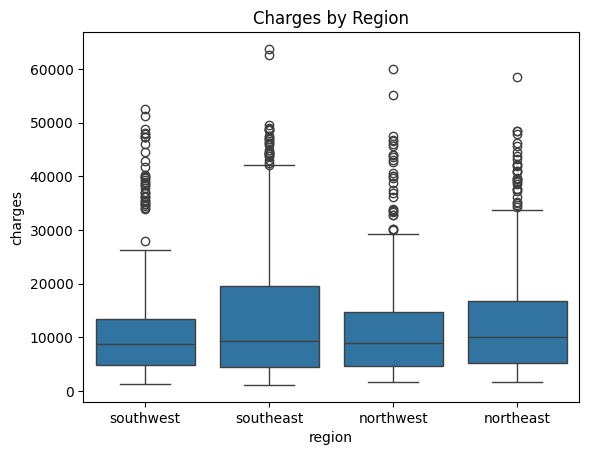

In [ ]:
# @title charges by region
sns.boxplot(x='region', y='charges', data=df)
plt.title('Charges by Region')
plt.show()

In this analysis, a boxplot is used to visualize the distribution of charges across different regions. The charges are plotted on the y-axis, while the x-axis categorizes the data based on the region of the individuals. This allows us to compare how charges differ by region and identify any variations in the spread or outliers within each region. The title and overall display of the plot are managed using Matplotlib’s tools, ensuring the plot is well-formatted and clear to interpret.



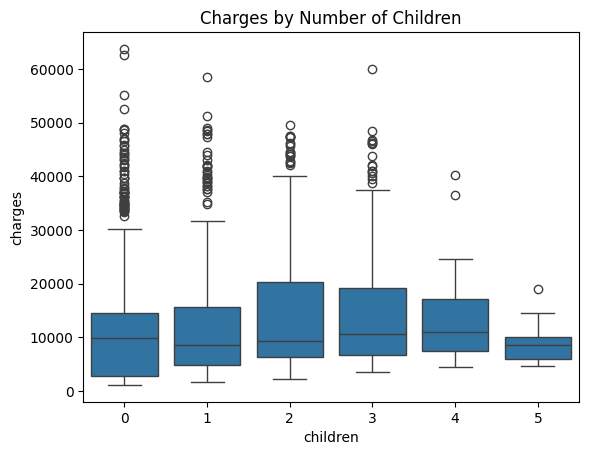

In [ ]:
# @title changes by number of children
sns.boxplot(x='children', y='charges', data=df)
plt.title('Charges by Number of Children')
plt.show()

In this analysis, a boxplot is used to visualize how insurance charges vary based on the number of children an individual has. The boxplot shows the charges on the y-axis, with the number of children categorized on the x-axis. This allows us to compare the distribution of charges for individuals with different numbers of children, highlighting any patterns or variations in the data. The title and display of the plot are managed using Matplotlib’s tools to ensure clarity and proper formatting of the visualization.

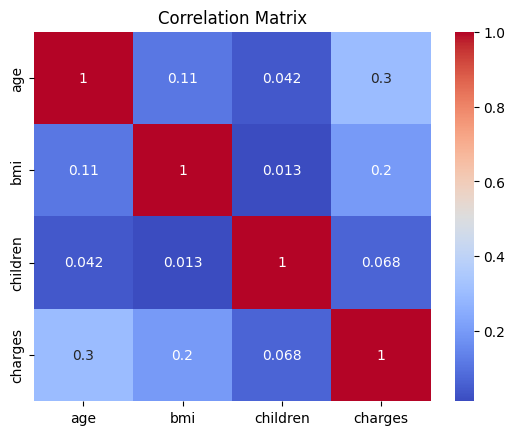

In [ ]:
# The boxplot visualization was implemented following the method demonstrated by Hackers Realm (2022).
# using Seaborn’s boxplot() function to compare insurance charges by gender.source:https://www.youtube.com/watch?v=1fFVt4tQjRE&t=1s
# @title correlation matrix
# Correlation heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In this analysis, a correlation heatmap is created to visualize the relationships between numerical variables in the dataset. The heatmap is generated using Seaborn’s heatmap() function, which calculates the correlation matrix and displays it with annotated values. The color scale, using the 'coolwarm' palette, helps to identify strong and weak correlations between variables. This visualization allows us to quickly understand how different features in the dataset are related to each other. The title and display of the heatmap are managed using Matplotlib’s tools for clear presentation

In [ ]:
# @title feature selection
# For linear regression, use all features, including encoded categorical variables
X = df.drop('charges', axis=1)
y = df['charges']



In this step, feature selection is performed by preparing the data for linear regression. We define the feature matrix X by dropping the target variable 'charges' from the dataset. The target variable y is defined as the 'charges' column. This approach includes all available features, including any encoded categorical variables, to be used in the linear regression model. By separating the features and the target variable, we ensure the model can learn from the data effectively.

In [ ]:
# @title Train model
# Define categorical and numeric features
categorical_features = ['sex', 'smoker', 'region']
numeric_features = ['age', 'bmi', 'children']

# Create transformer for encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough'  # keep numeric columns
)

# Create a pipeline with preprocessing and regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', LinearRegression())])

In this step, we define the categorical and numeric features of the dataset. The categorical features include 'sex', 'smoker', and 'region', while the numeric features are 'age', 'bmi', and 'children'. To handle the categorical features, we use a ColumnTransformer to apply OneHotEncoder (with the first category dropped to avoid multicollinearity). This ensures that the categorical variables are properly encoded before being passed to the model. Numeric features are passed through unchanged.

We then create a Pipeline that first applies the preprocessing step (encoding categorical variables) and then fits a Linear Regression model. This pipeline ensures that the preprocessing and model fitting are done in one seamless step.

Finally, we split the dataset into training and testing sets using the train_test_split function, reserving 20% of the data for testing and the remaining 80% for training. The random_state=42 ensures reproducibility of the split.

In [ ]:
# @title Evaluate model
# Predict on test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")




Model Evaluation:
Mean Squared Error (MSE): 33596915.85
R-squared (R2 Score): 0.78


In this step, we evaluate the performance of the trained model on the test set. We begin by using the model to make predictions on the test data, generating predicted values (y_pred) for the target variable. Next, we calculate two key evaluation metrics to assess the model's accuracy: Mean Squared Error (MSE) and R-squared (R2 Score). The MSE measures the average squared difference between the predicted and actual values, while the R2 Score indicates how well the model explains the variance in the target variable. These metrics help in determining how well the model performs and whether it can generalize to unseen data.

In [ ]:
# @title Retrain with adjustments (if needed)
# In case performance needs improvement, we could try:
# - Polynomial features
# - Regularization (Ridge/Lasso)
# - Feature transformation
# For simplicity, let’s retrain using Ridge regression as an example

from sklearn.linear_model import Ridge

# Replace LinearRegression with Ridge in pipeline
ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])

ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate Ridge model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nRidge Regression Evaluation:")
print(f"Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"R-squared (R2 Score): {r2_ridge:.2f}")





Ridge Regression Evaluation:
Mean Squared Error (MSE): 33645037.09
R-squared (R2 Score): 0.78


In this step, we improve model performance using strategies like adding polynomial features, applying regularization (Ridge or Lasso), or feature transformations. We retrain the model using Ridge Regression, which helps prevent overfitting by adding regularization. The original Linear Regression model is replaced with Ridge Regression, with the alpha parameter set to 1.0. After retraining on the training data, the model’s performance is evaluated using Mean Squared Error (MSE) and R-squared (R2 Score) to assess accuracy and how well it explains the variance in the target variable.

In [ ]:
# Import libraries
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# Load the dataset (replace with your actual data loading method)
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df = pd.read_csv(url)

# Preprocess categorical variables (sex, smoker, region)
label_encoders = {}
categorical_cols = ['sex', 'smoker', 'region']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for reference

# Define predictors (X) and target (y)
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']

# Add constant for intercept term
X = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X).fit()

# Generate regression summary table
print(model.summary())

# Save summary to HTML (optional, for submission)
with open('ols_regression_summary.html', 'w') as f:
    f.write(model.summary().as_html())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Fri, 25 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:13:40   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.182e+04    955.130    -12.371      0.0